<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


We will import the following libraries for the lab


In [100]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [101]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [102]:
data = pd.read_csv('/Users/romeromusadat/Library/CloudStorage/OneDrive-Personal/OneDrive/0.IBM Data Science Course/C10/1/12/dataset_part_2.csv')

In [103]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [104]:
X = pd.read_csv('/Users/romeromusadat/Library/CloudStorage/OneDrive-Personal/OneDrive/0.IBM Data Science Course/C10/2/22/dataset_part_3.csv')

In [105]:
X.head(100)

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_GEO,Orbit_GTO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88.0,15400.000000,6.0,1.0,1.0,1.0,5.0,5.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,89.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [106]:
# Create a NumPy array from the 'Class' column
Y = data['Class'].to_numpy()

# Verify the shape and type
print("\nShape of Y:", Y.shape)
print("Data type of Y:", Y.dtype)



Shape of Y: (90,)
Data type of Y: int64


## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [107]:
# students get this 
transform = preprocessing.StandardScaler()
# Initialize the StandardScaler
transform = preprocessing.StandardScaler()

# Fit and transform the data
X_transform = transform.fit_transform(X)

# Convert the scaled data back to a DataFrame for convenience
X_transform = pd.DataFrame(X_transform, columns=X.columns)

# Display the first few rows of the scaled DataFrame
print("\nFirst Five Rows of Scaled 'X' DataFrame:")
print(X_transform.head())



First Five Rows of Scaled 'X' DataFrame:
   FlightNumber   PayloadMass   Flights  GridFins    Reused      Legs  \
0     -1.712912 -1.948145e-16 -0.653913 -1.870829 -0.835532 -1.933091   
1     -1.674419 -1.195232e+00 -0.653913 -1.870829 -0.835532 -1.933091   
2     -1.635927 -1.162673e+00 -0.653913 -1.870829 -0.835532 -1.933091   
3     -1.597434 -1.200587e+00 -0.653913 -1.870829 -0.835532 -1.933091   
4     -1.558942 -6.286706e-01 -0.653913 -1.870829 -0.835532 -1.933091   

      Block  ReusedCount  Orbit_GEO  Orbit_GTO  ...  Serial_B1048  \
0 -1.575895     -0.97344     -0.106  -0.654654  ...     -0.215666   
1 -1.575895     -0.97344     -0.106  -0.654654  ...     -0.215666   
2 -1.575895     -0.97344     -0.106  -0.654654  ...     -0.215666   
3 -1.575895     -0.97344     -0.106  -0.654654  ...     -0.215666   
4 -1.575895     -0.97344     -0.106   1.527525  ...     -0.215666   

   Serial_B1049  Serial_B1050  Serial_B1051  Serial_B1054  Serial_B1056  \
0     -0.267261        -0.106

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [108]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X_transform, Y, test_size=0.2, random_state=2
)

# Verify the shapes
print("\nShapes After train_test_split:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("Y_train:", Y_train.shape)
print("Y_test:", Y_test.shape)

# Verify the number of test samples
print("\nNumber of Test Samples:", Y_test.shape[0])



Shapes After train_test_split:
X_train: (72, 76)
X_test: (18, 76)
Y_train: (72,)
Y_test: (18,)

Number of Test Samples: 18


we can see we only have 18 test samples.


In [109]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [110]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [111]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [112]:
# Define the parameter grid
parameters_lr = {
    'C': [0.01, 0.1, 1],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

# Initialize the Logistic Regression model
lr = LogisticRegression()

# Initialize GridSearchCV
logreg_cv = GridSearchCV(
    estimator=lr,
    param_grid=parameters_lr,
    cv=10,
    scoring='accuracy',
    n_jobs=-1
)

# Fit GridSearchCV
logreg_cv.fit(X_train, Y_train)

# Output the best parameters and best score
print("Tuned Hyperparameters for Logistic Regression:", logreg_cv.best_params_)
print("Best Cross-Validation Accuracy for Logistic Regression:", logreg_cv.best_score_)


Tuned Hyperparameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validation Accuracy for Logistic Regression: 0.8071428571428572


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:



Logistic Regression Test Accuracy: 0.8333333333333334


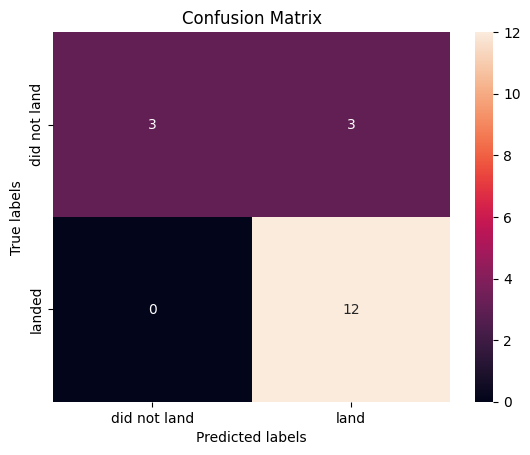

In [113]:
# Predict on the test set
yhat = logreg_cv.predict(X_test)

# Calculate test accuracy
test_accuracy_lr = logreg_cv.score(X_test, Y_test)
print("\nLogistic Regression Test Accuracy:", test_accuracy_lr)

# Plot the confusion matrix
plot_confusion_matrix(Y_test, yhat)


Lets look at the confusion matrix:


Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [114]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [115]:
# Define the parameter grid
parameters_svm = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}

# Initialize the SVM model
svm = SVC()

# Initialize GridSearchCV
svm_cv = GridSearchCV(
    estimator=svm,
    param_grid=parameters_svm,
    cv=10,
    scoring='accuracy',
    n_jobs=-1
)

# Fit GridSearchCV
svm_cv.fit(X_train, Y_train)

# Output the best parameters and best score
print("Tuned Hyperparameters for SVM:", svm_cv.best_params_)
print("Best Cross-Validation Accuracy for SVM:", svm_cv.best_score_)


Tuned Hyperparameters for SVM: {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Best Cross-Validation Accuracy for SVM: 0.85


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:



SVM Test Accuracy: 0.8333333333333334


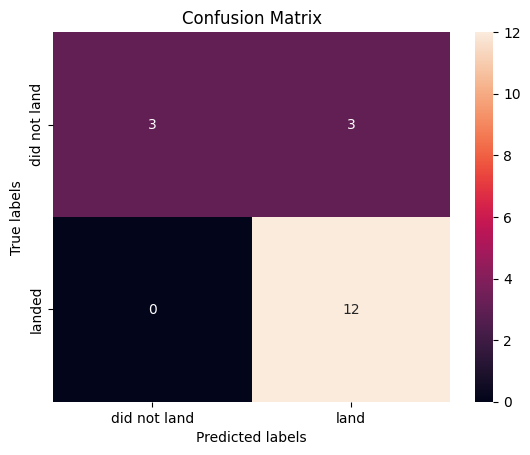

In [116]:
# Predict on the test set
yhat_svm = svm_cv.predict(X_test)

# Calculate test accuracy
test_accuracy_svm = svm_cv.score(X_test, Y_test)
print("\nSVM Test Accuracy:", test_accuracy_svm)

# Plot the confusion matrix
plot_confusion_matrix(Y_test, yhat_svm)

We can plot the confusion matrix


## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [117]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [118]:
# Define the parameter grid
parameters_tree = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2 * n for n in range(1, 10)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Decision Tree model
tree = DecisionTreeClassifier()

# Initialize GridSearchCV
tree_cv = GridSearchCV(
    estimator=tree,
    param_grid=parameters_tree,
    cv=10,
    scoring='accuracy',
    n_jobs=-1
)

# Fit GridSearchCV
tree_cv.fit(X_train, Y_train)

# Output the best parameters and best score
print("Tuned Hyperparameters for Decision Tree:", tree_cv.best_params_)
print("Best Cross-Validation Accuracy for Decision Tree:", tree_cv.best_score_)


Tuned Hyperparameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
Best Cross-Validation Accuracy for Decision Tree: 0.8571428571428571


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1779 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python

## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:



Decision Tree Test Accuracy: 0.8333333333333334


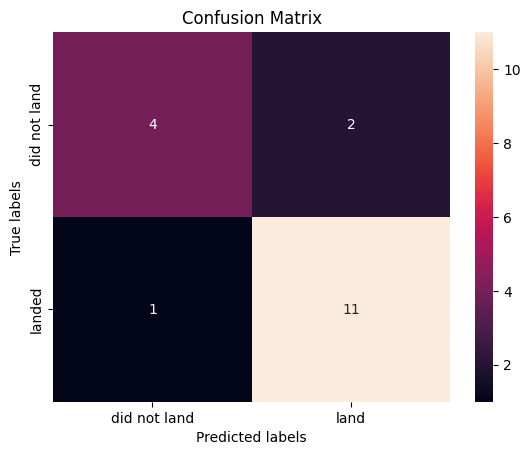

In [119]:
# Predict on the test set
yhat_tree = tree_cv.predict(X_test)

# Calculate test accuracy
test_accuracy_tree = tree_cv.score(X_test, Y_test)
print("\nDecision Tree Test Accuracy:", test_accuracy_tree)

# Plot the confusion matrix
plot_confusion_matrix(Y_test, yhat_tree)

We can plot the confusion matrix


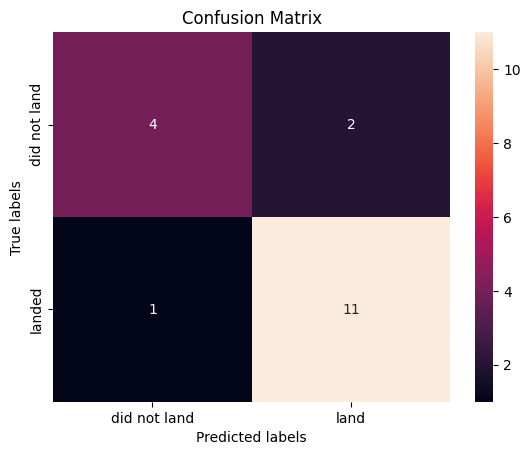

In [120]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [121]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [122]:
# Define the parameter grid
parameters_knn = {
    'n_neighbors': list(range(1, 11)),  # 1 to 10
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # 1: Manhattan, 2: Euclidean
}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Initialize GridSearchCV
knn_cv = GridSearchCV(
    estimator=knn,
    param_grid=parameters_knn,
    cv=10,
    scoring='accuracy',
    n_jobs=-1
)

# Fit GridSearchCV
knn_cv.fit(X_train, Y_train)

# Output the best parameters and best score
print("Tuned Hyperparameters for KNN:", knn_cv.best_params_)
print("Best Cross-Validation Accuracy for KNN:", knn_cv.best_score_)


Tuned Hyperparameters for KNN: {'algorithm': 'auto', 'n_neighbors': 6, 'p': 1}
Best Cross-Validation Accuracy for KNN: 0.8482142857142856


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:



KNN Test Accuracy: 0.8333333333333334


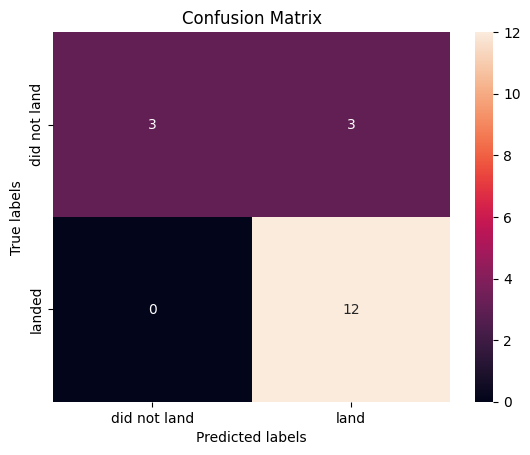

In [123]:
# Predict on the test set
yhat_knn = knn_cv.predict(X_test)

# Calculate test accuracy
test_accuracy_knn = knn_cv.score(X_test, Y_test)
print("\nKNN Test Accuracy:", test_accuracy_knn)

# Plot the confusion matrix
plot_confusion_matrix(Y_test, yhat_knn,)

We can plot the confusion matrix


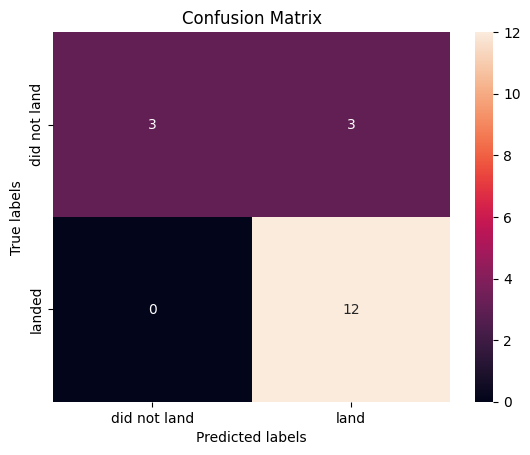

In [124]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


In [125]:
# Compile the test accuracies of all models
model_performance = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN'],
    'Test Accuracy': [test_accuracy_lr, test_accuracy_svm, test_accuracy_tree, test_accuracy_knn]
})

# Display the model performances
print("\nModel Performance on Test Data:")
print(model_performance)

# Identify the best-performing model
best_model = model_performance.loc[model_performance['Test Accuracy'].idxmax()]
print("\nBest Performing Model:")
print(best_model)



Model Performance on Test Data:
                 Model  Test Accuracy
0  Logistic Regression       0.833333
1                  SVM       0.833333
2        Decision Tree       0.833333
3                  KNN       0.833333

Best Performing Model:
Model            Logistic Regression
Test Accuracy               0.833333
Name: 0, dtype: object


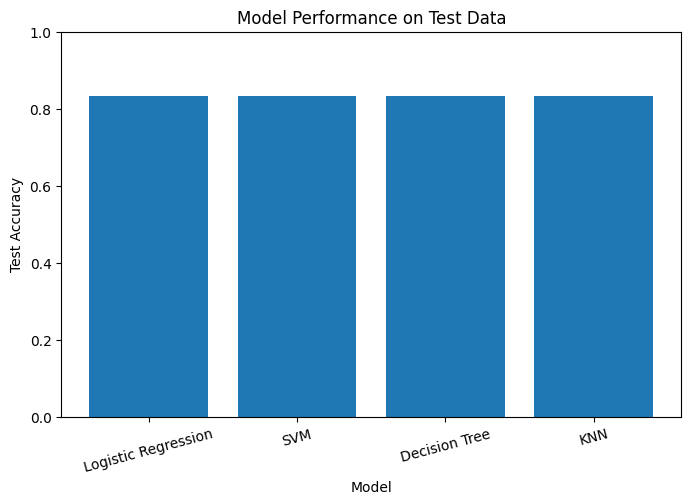

In [126]:
# Plot a bar chart for model performances
plt.figure(figsize=(8, 5))
plt.bar(model_performance['Model'], model_performance['Test Accuracy'])
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Model Performance on Test Data')
plt.ylim(0, 1)  # Test accuracy ranges between 0 and 1
plt.xticks(rotation=15)
plt.show()


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
